In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.kaggle.com/datasets/shivamb/netflix-shows
df = pd.read_csv('./netflix_titles.csv')

# 1 Netflix Dataset from mid-2021

In [3]:
df.shape

(8807, 12)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
round(((df.isnull().sum())/df.shape[0])*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

# 2. Handle Null values

## 2.1 drop rows with null values in duration, rating and date_added columns

In [8]:
df.dropna(subset=['duration', 'rating','date_added'], inplace=True)
df.isnull().sum().sort_values(ascending=False)

director        2621
country          829
cast             825
show_id            0
type               0
title              0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

## 2.2 Handle null values inside country column

In [9]:
df.country.value_counts().head(10)

United States     2809
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [10]:
df.country.replace(np.nan, 'Unknown', inplace=True)
df.country.value_counts().head(10)

United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

In [11]:
round(((df.isnull().sum())/df.shape[0])*100,2).sort_values(ascending=False)

director        29.82
cast             9.39
show_id          0.00
type             0.00
title            0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

## 2.3 Handle null values inside cast column

In [12]:
df.cast.replace(np.nan, 'No Cast', inplace=True)
round(((df.isnull().sum())/df.shape[0])*100,2).sort_values(ascending=False)

director        29.82
show_id          0.00
type             0.00
title            0.00
cast             0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

## 2.4 Handle null values inside director column

In [13]:
df.director.replace(np.nan, 'No Director', inplace=True)
round(((df.isnull().sum())/df.shape[0])*100,2).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

# 3 Creating dataset for tv shows and movies

In [14]:
movies_df = df.loc[(df['type']=='Movie')]
movies_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [15]:
shows_df = df.loc[(df['type']=='TV Show')]
shows_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


## 3.1 Duration column type change (movies dataframe)

In [16]:
movies_df = movies_df.copy()
movies_df.loc[:, 'duration'] = movies_df.duration.apply(lambda x: x.replace(" min","") if 'min' in x else x)
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [17]:
movies_df.duration = movies_df.duration.astype('int64')
movies_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
dtype: object

## 3.2 Duration column type change (tv shows dataframe)

In [18]:
shows_df = shows_df.copy()
shows_df.loc[:, 'duration'] = shows_df.duration.apply(lambda x: x.replace(" Season","") if 'Season' in x else x)
shows_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2s,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [19]:
shows_df.duration = shows_df.duration.apply(lambda x: x.replace("s","") if 's' in x else x)
shows_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [20]:
shows_df.duration = shows_df.duration.astype('int64')
shows_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
dtype: object

# 4 EDA

## 4.1 Number of tv shows and movies

In [21]:
df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [22]:
total=df.type.value_counts().sum()
def autopct_format(prct_value):
    return '{:.0f}'.format(total*prct_value/100)

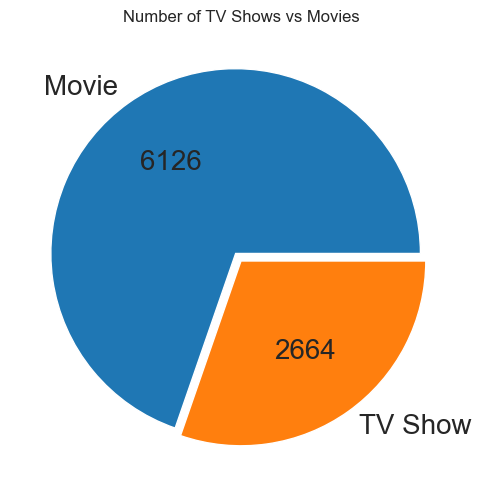

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.type.value_counts().values, 
        labels=df.type.value_counts().index,
        explode=[0.05,0],
        autopct=autopct_format,
        textprops={'fontsize': 20})
plt.title("Number of TV Shows vs Movies")
plt.show()

## 4.2 Ratings

In [24]:
rating=df.rating.value_counts().reset_index()
rating

,index,rating
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


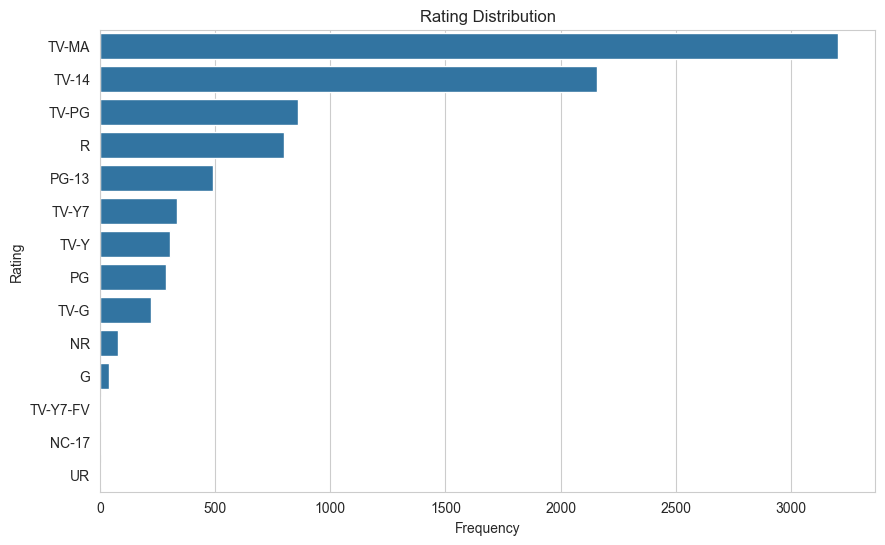

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='index', data=rating, orient='h')
plt.xlabel('Frequency')
plt.ylabel('Rating')
plt.title('Rating Distribution')
plt.show()

ADULTS: 

        TV-MA: For Mature Audience
        
        NC-17: Inappropriate for ages 17 and under
        
        R:     Restricted. May be inappropriate for ages under 17
        
Teens:  

        PG-13: Parents strongly cautioned. May be inappropriate for ages under 13
        
        TV-14: Parents strongly cautioned. May not be suitable for ages under 14

Kids:    
        
        TV-Y: Designed to be appropriate for all children
        
        TV-Y7: Suitable for ages 7 and up
            
            G: Suitable for General Audiences
         
         TV-G: Suitable for General Audiences
           
           PG: Parental Guidance Suggested
        
        TV-PG: Parental Guidance Suggested

## 4.3 Top 10 countries

In [26]:
df.country.value_counts().head(10)

United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

## 4.4 Top 10 years by number of releases on Netflix

In [27]:
df.release_year.value_counts().head(10)

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64

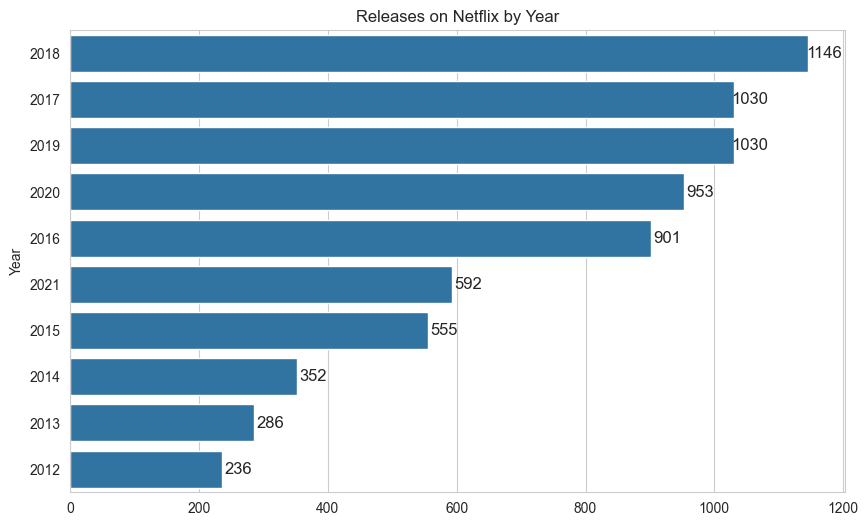

In [28]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(y='release_year', data=df, order=df.release_year.value_counts().index[0:10])
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + p.get_height()/2),
                xytext=(7, 0), textcoords='offset points', ha='center', va='center',fontsize=12)
plt.xlabel('')
plt.ylabel('Year')
plt.title('Releases on Netflix by Year')
plt.show()

## 4.5 Top 10 genres on Netflix

In [29]:
df.listed_in.value_counts().head(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

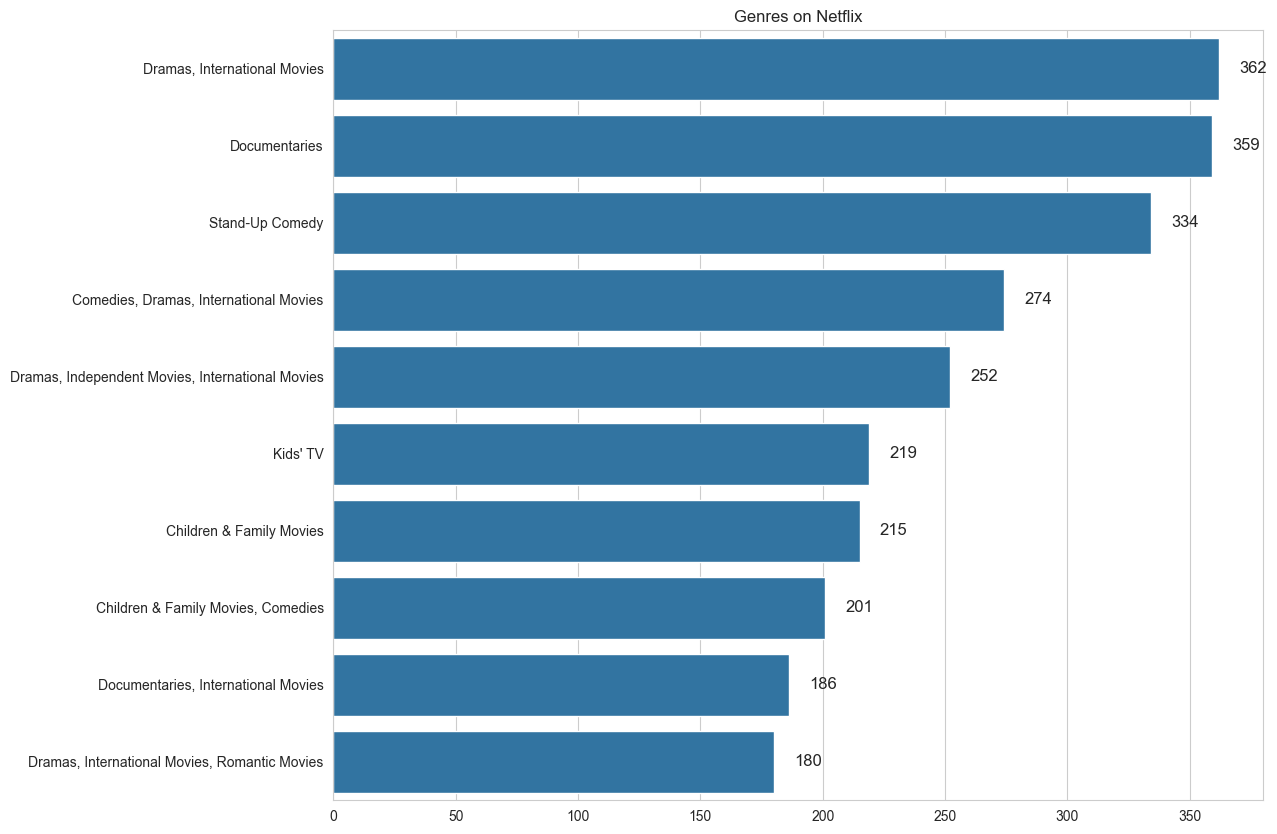

In [30]:
plt.figure(figsize=(12, 10))
ax=sns.countplot(y='listed_in', data=df, order=df.listed_in.value_counts().index[0:10])
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + p.get_height()/2),
                xytext=(7, 0), textcoords='offset points', ha='center', va='center',fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.title('Genres on Netflix')
plt.show()

## 4.5 Top 10 directors on Netflix

In [31]:
df.director.where(df['director'] != 'No Director').value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

## 4.6 Shortest movie and longest movie

In [32]:
shortest_movie=movies_df.loc[(movies_df['duration']==np.min(movies_df.duration))]
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No Cast,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [33]:
longest_movie=movies_df.loc[(movies_df['duration']==np.max(movies_df.duration))]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,No Director,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


## 4.7 Longest running shows

In [56]:
longest_shows = shows_df.loc[(shows_df['duration']>=10)]
longest_shows.sort_values(by='duration', ascending=False)
new_longest_shows = longest_shows[['title', 'release_year', 'duration', 'rating']]
print(new_longest_shows.to_string(index=False))

                             title  release_year  duration rating
                  The Walking Dead          2019        10  TV-MA
                    Grey's Anatomy          2020        17  TV-14
                         Heartland          2019        13  TV-14
                     Stargate SG-1          2006        10  TV-MA
LEGO Ninjago: Masters of Spinjitzu          2019        10  TV-Y7
                  Shameless (U.S.)          2019        10  TV-MA
                      Supernatural          2019        15  TV-14
            COMEDIANS of the world          2019        13  TV-MA
                              NCIS          2017        15  TV-14
                 Trailer Park Boys          2018        12  TV-MA
                    Criminal Minds          2017        12  TV-14
  Danger Mouse: Classic Collection          1992        10   TV-Y
                            Cheers          1992        11  TV-PG
                        Dad's Army          1977        10  TV-PG


In [61]:
longest_shows.rating.value_counts()

TV-MA    5
TV-14    5
TV-PG    2
TV-Y7    1
TV-Y     1
Name: rating, dtype: int64

## 4.8 Added to netflix (months, years)

In [80]:
new_df=df.copy()
new_df['month_added']=df.date_added.apply(lambda x: x.split()[0])
new_df['year_added']=df.date_added.apply(lambda x: x.split()[2])
new_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021


In [83]:
new_df.month_added.value_counts()

July         827
December     812
September    769
April        763
October      760
August       754
March        741
January      737
June         728
November     705
May          632
February     562
Name: month_added, dtype: int64

In [84]:
new_df.year_added.value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

In [90]:
release_counts = new_df.groupby(['month_added', 'year_added']).size().unstack().fillna(0)

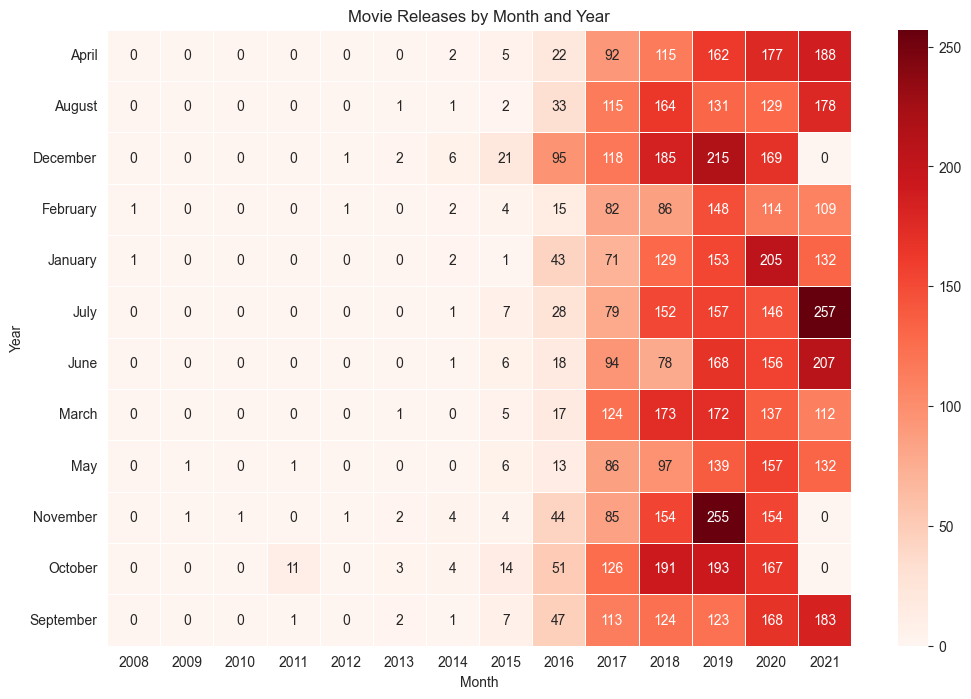

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(release_counts, cmap='Reds', annot=True, fmt='g', linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Movie Releases by Month and Year')
plt.show()